In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/AIfinal

/content/drive/MyDrive/AIfinal


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset
life_expectancy_df = pd.read_csv('/content/drive/MyDrive/AIfinal/Life Expectancy Data.csv')

# Display first few rows
print(life_expectancy_df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [6]:
# Check for missing values
print("Missing Values:\n", life_expectancy_df.isnull().sum())

# Fill missing values with mean
# Check for column names with spaces
life_expectancy_df.columns = life_expectancy_df.columns.str.strip()

# Select only numeric columns
numeric_cols = life_expectancy_df.select_dtypes(include=['number']).columns

# Fill missing values only for numeric columns
life_expectancy_df[numeric_cols] = life_expectancy_df[numeric_cols].fillna(life_expectancy_df[numeric_cols].mean())


# Convert categorical variables (if any)
life_expectancy_df = pd.get_dummies(life_expectancy_df, drop_first=True)

# Split into features and target
# Strip whitespace from column names
life_expectancy_df.columns = life_expectancy_df.columns.str.strip()

# Define features (X) and target (y)
X = life_expectancy_df.drop(columns=["Life expectancy"])  # Features
y = life_expectancy_df["Life expectancy"]  # Target


# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Missing Values:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


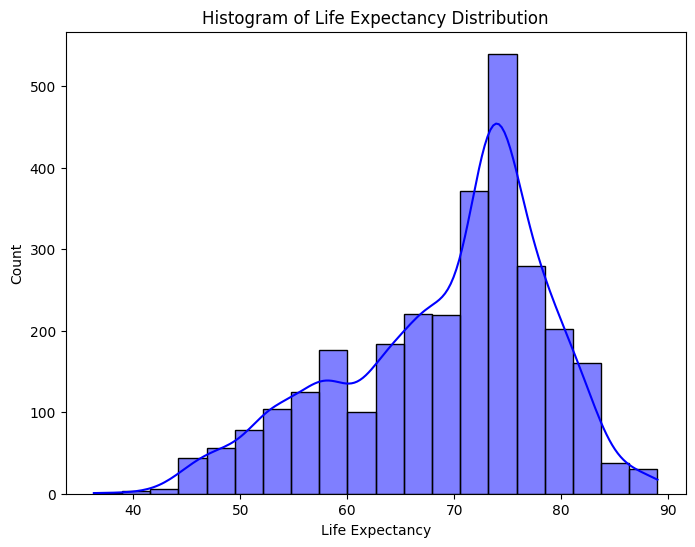

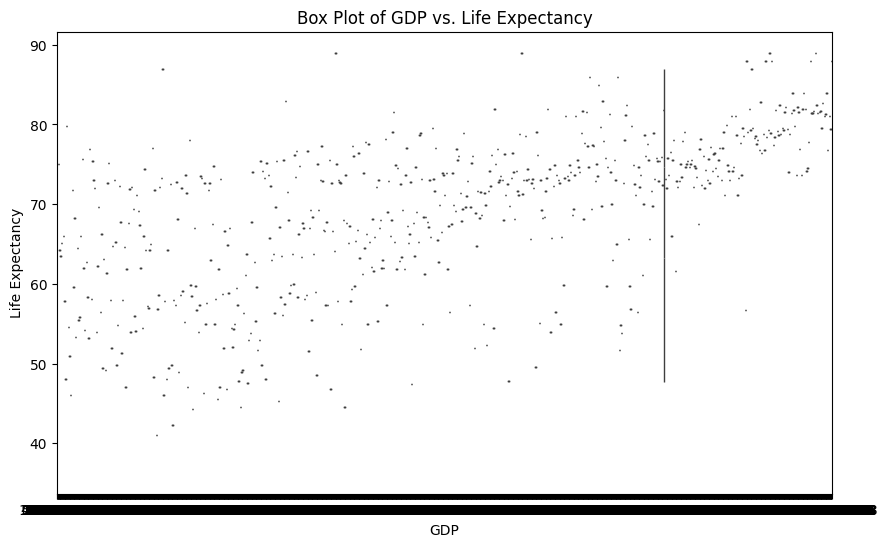

In [12]:
# HISTOGRAM: Life Expectancy Distribution
plt.figure(figsize=(8, 6))
sns.histplot(life_expectancy_df["Life expectancy"], bins=20, kde=True, color='blue')
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.title("Histogram of Life Expectancy Distribution")
plt.show()

# BOX PLOT: GDP vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.boxplot(x=life_expectancy_df["GDP"], y=life_expectancy_df["Life expectancy"])
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.title("Box Plot of GDP vs. Life Expectancy")
plt.show()


Mean Squared Error: 3.435781597067537
R-squared Score: 0.9603420024762042


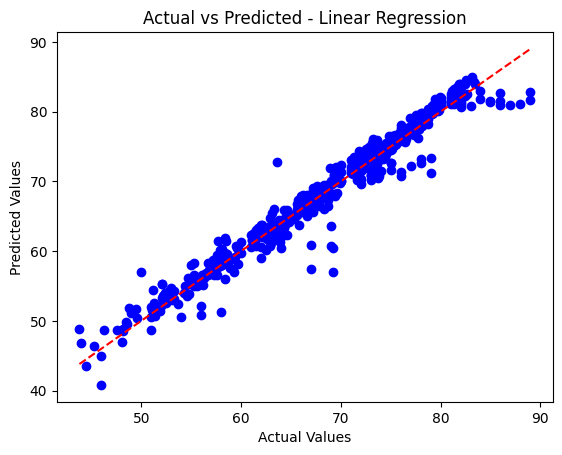

In [13]:
# Train Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = linear_regressor.predict(X_test)

# Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Visualization - Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()


Random Forest Mean Squared Error: 2.6503992142631336
Random Forest R-squared Score: 0.9694073902817253


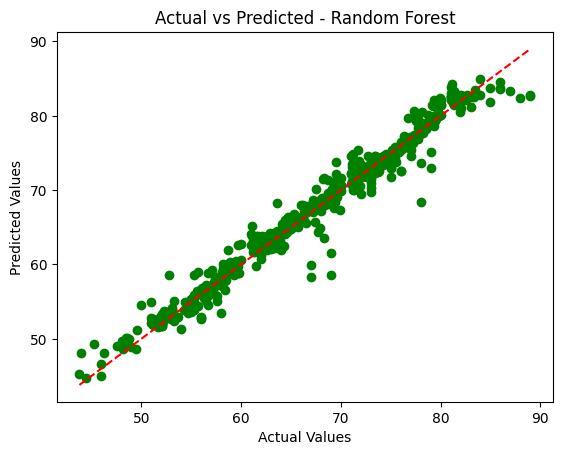

In [17]:
# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict
rf_pred = rf_regressor.predict(X_test)

# Evaluate
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("Random Forest R-squared Score:", r2_score(y_test, rf_pred))

# Visualization - Actual vs Predicted
plt.scatter(y_test, rf_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest")
plt.show()


In [16]:
# GridSearch for Random Forest Regression
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for Random Forest Regressor:", grid.best_params_)


Best Parameters for Random Forest Regressor: {'max_depth': None, 'n_estimators': 100}
